In [36]:
#Importing dependencies
import sqlalchemy
from sqlalchemy import create_engine 
from sqlalchemy.ext.automap import automap_base 
from sqlalchemy.orm import Session 
base = automap_base()
import pandas as pd

In [37]:
#Create engine , read schema and open am ORM session 
engine = create_engine(f'sqlite:///employee_compensation.sqlite')
base.prepare(autoload_with=engine)
session = Session(bind=engine)

In [38]:
#Get the keys from the sqlite database
base.classes.keys()

['salaries']

In [39]:
#Read the schema from the tabel
base.metadata.tables

FacadeDict({'salaries': Table('salaries', MetaData(), Column('id', INTEGER(), table=<salaries>, primary_key=True, nullable=False), Column('OrganisationGroupCode', INTEGER(), table=<salaries>), Column('JobFamilyCode', TEXT(), table=<salaries>), Column('JobCode', TEXT(), table=<salaries>), Column('YearType', TEXT(), table=<salaries>), Column('Year', INTEGER(), table=<salaries>), Column('OrganisationGroup', TEXT(), table=<salaries>), Column('DepartmentCode', TEXT(), table=<salaries>), Column('Department', TEXT(), table=<salaries>), Column('UnionCode', FLOAT(), table=<salaries>), Column('Union', TEXT(), table=<salaries>), Column('JobFamily', TEXT(), table=<salaries>), Column('Job', TEXT(), table=<salaries>), Column('EmployeeIdentifier', INTEGER(), table=<salaries>), Column('Salaries', FLOAT(), table=<salaries>), Column('Overtime', FLOAT(), table=<salaries>), Column('OtherSalaries', FLOAT(), table=<salaries>), Column('TotalSalary', FLOAT(), table=<salaries>), Column('Retirement', FLOAT(), t

In [54]:
#Make a connection btw Python and Sqllite 
connection = engine.connect()
#Read the table using Pandas 
df = pd.read_sql('SELECT * FROM salaries',connection)
df.head()

,id,OrganisationGroupCode,JobFamilyCode,JobCode,YearType,Year,OrganisationGroup,DepartmentCode,Department,UnionCode,...,EmployeeIdentifier,Salaries,Overtime,OtherSalaries,TotalSalary,Retirement,HealthAndDental,OtherBenefits,TotalBenefits,TotalCompensation
0,678519,1,1000,1032,Fiscal,2021,Public Protection,ADP,Adult Probation,21.0,...,45702731,102240.10,0.0,0.00,102240.10,23011.49,15603.29,7676.13,46290.91,148531.01
1,678520,1,1000,1041,Fiscal,2021,Public Protection,ADP,Adult Probation,21.0,...,45704565,128554.00,0.0,0.00,128554.00,28341.96,15603.29,10063.72,54008.97,182562.97
2,678521,1,1000,1053,Fiscal,2021,Public Protection,ADP,Adult Probation,21.0,...,45916094,75968.25,0.0,97.66,76065.91,17058.48,9301.81,5783.24,32143.53,108209.44
3,678522,1,1000,1054,Fiscal,2021,Public Protection,ADP,Adult Probation,21.0,...,45709888,165808.00,0.0,0.00,165808.00,36519.04,15603.29,11910.67,64033.00,229841.00
4,678523,1,1000,1070,Fiscal,2021,Public Protection,ADP,Adult Probation,21.0,...,45697078,182832.00,0.0,0.00,182832.00,40268.53,15603.29,12139.96,68011.78,250843.78


In [41]:
#Get the number of rows and columns
df.shape

(39930, 23)

In [42]:
#Check for missing values in the table
df.isna().sum()

id                       0
OrganisationGroupCode    0
JobFamilyCode            0
JobCode                  0
YearType                 0
Year                     0
OrganisationGroup        0
DepartmentCode           0
Department               0
UnionCode                0
Union                    0
JobFamily                0
Job                      0
EmployeeIdentifier       0
Salaries                 0
Overtime                 0
OtherSalaries            0
TotalSalary              0
Retirement               0
HealthAndDental          0
OtherBenefits            0
TotalBenefits            0
TotalCompensation        0
dtype: int64

In [43]:
#Create a df with the avg total benefit for each department
total_benefit_by_dept = df.groupby('Department')['TotalBenefits'].mean().reset_index()
total_benefit_by_dept = total_benefit_by_dept.set_index('Department')
total_benefit_by_dept = total_benefit_by_dept.sort_values('TotalBenefits')

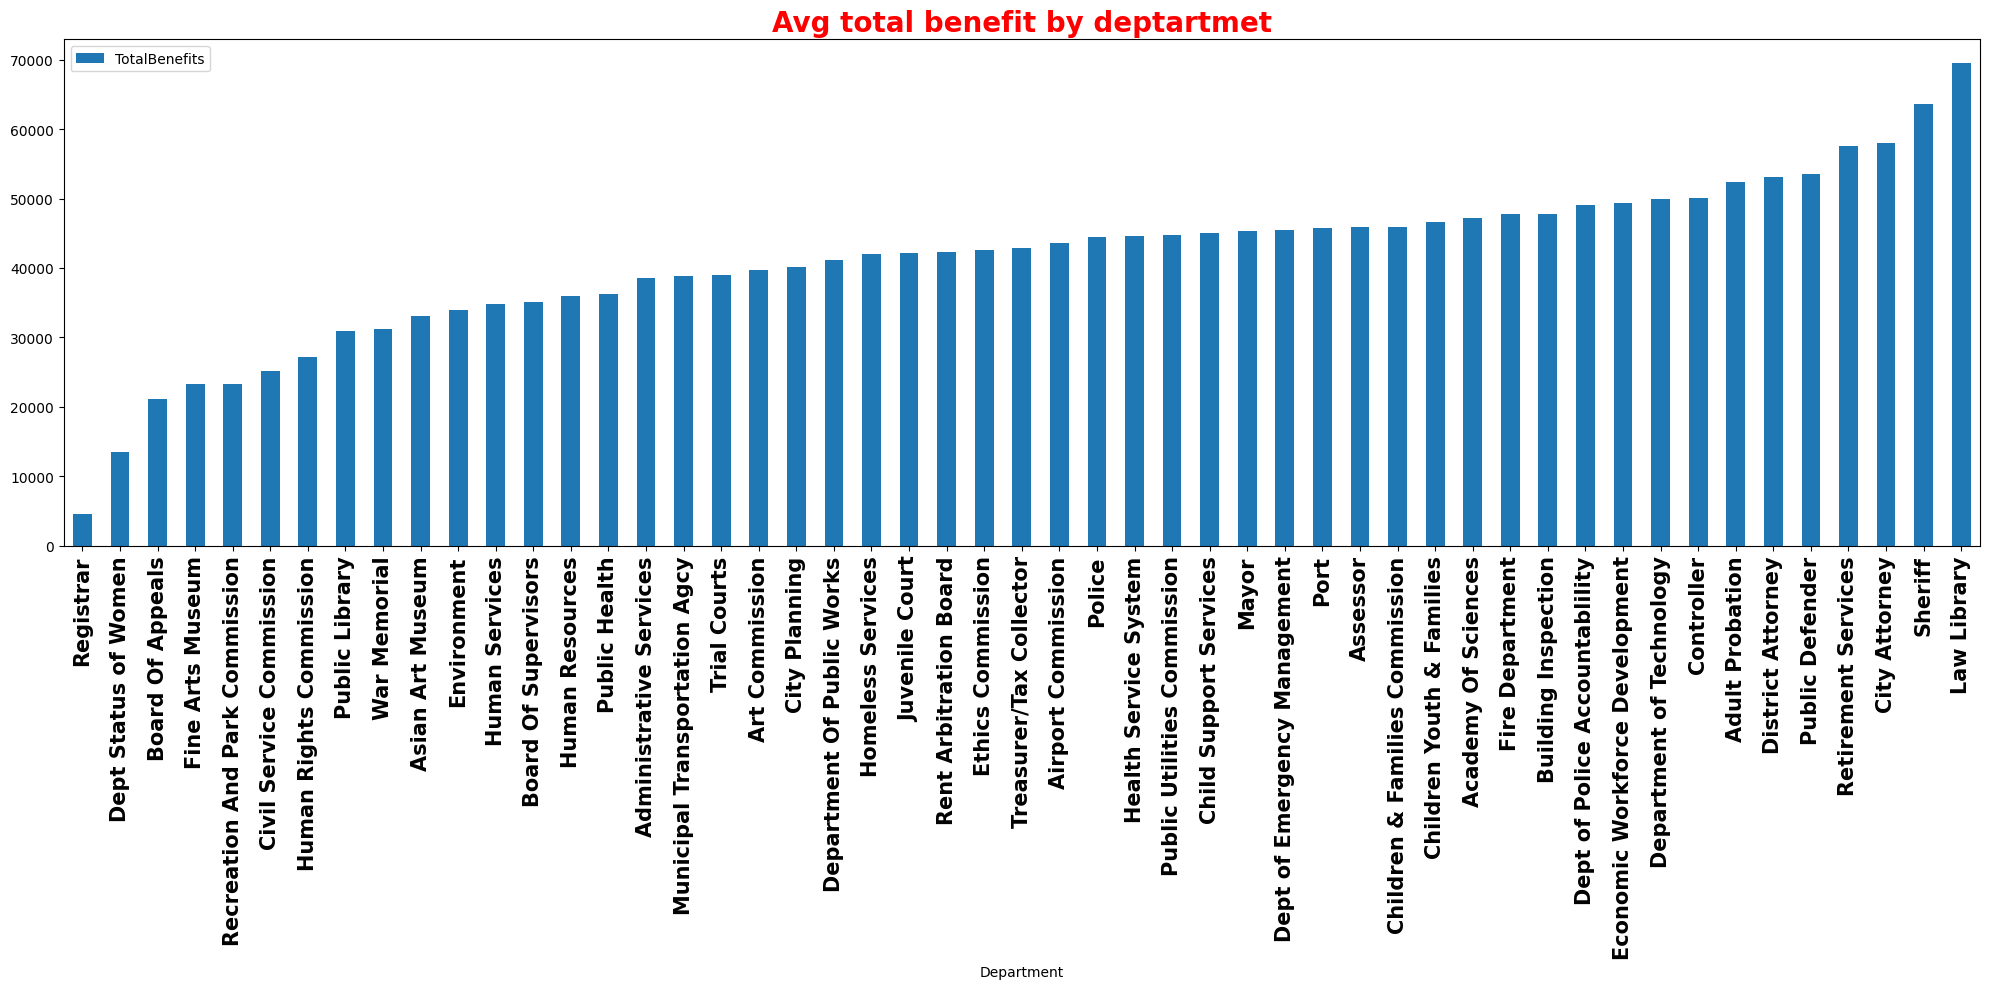

In [53]:
#Plot the result 
import matplotlib.pyplot as plt
total_benefit_by_dept.plot(kind='bar',figsize=(20,10))
plt.xticks(fontsize=15,fontweight='bold')
plt.title('Avg total benefit by deptartmet',fontsize=20,fontweight='bold',color='r')
plt.tight_layout()
plt.show()